# Introduction to Machine Learning
## Lecture 5 - Multilayer Perceptron
### Notebook 1: Creating an MLP Regressor
Prapared by: Said Bolluk

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Data Preparation

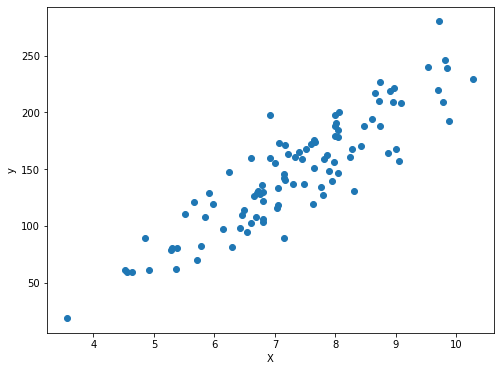

In [2]:
X, y = make_regression(
    n_samples=100, n_features=1, n_targets=1, 
    random_state=42, noise=25, bias=150,
)

# Bias term moved the y-axis upward so we have positive y values
# Now, make x values positive
X = (X + 5) * 1.5

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [3]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=42,
)

# MLP Regressor

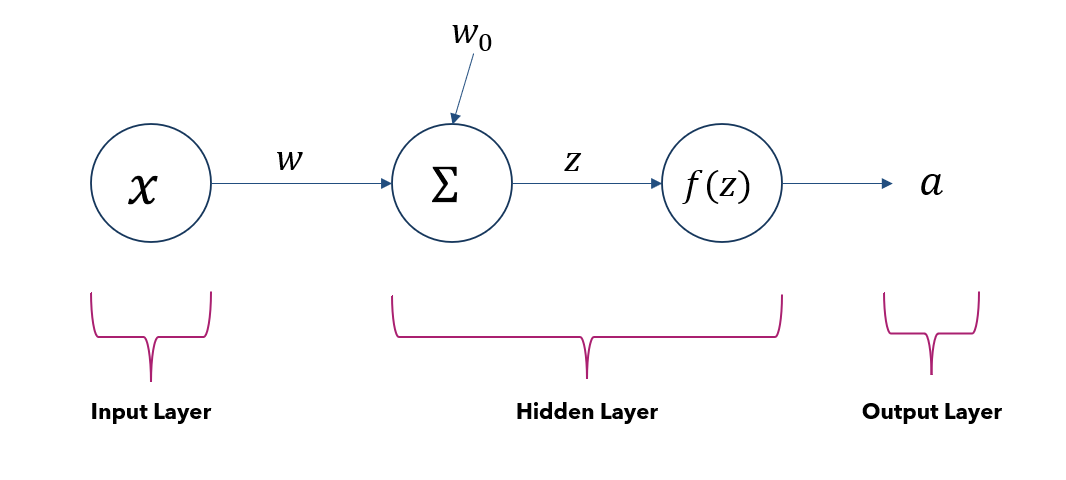

In [4]:
from IPython.display import Image
Image("notebook_mlp1_regressor.png", width=500)

## Training

Initial Weights:
W: 1.764052345967664
W0: 0.4001572083672233

Final Weights:
W: 29.760477084101158
W0: -71.98808455573547


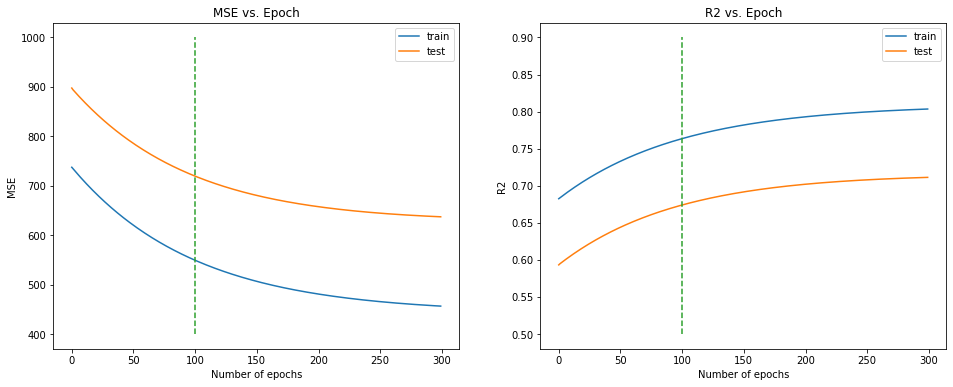

In [5]:
lr = 1e-3
epoch = 300

# Create weights for one hidden layer with one hidden unit: W and W0 (bias)
np.random.seed(0)
W = np.random.normal()
W0 = np.random.normal()
print("Initial Weights:")
print("W:", W)
print("W0:", W0)

# Import the regression metrics: MSE and R2
from sklearn.metrics import mean_squared_error, r2_score

train_losses = list()
test_losses = list()

r2_train = list()
r2_test = list()

for t in range(epoch):
    
    # 1) Training    
    for x_train, r_train in zip(X_train, y_train):
        
        x_t = x_train.item()
        
        # Forward Pass
        z_train = W*x_t + W0
        a_train = z_train
        
        # Backpropagation
        delta_w = lr*2*(r_train-a_train)*(-1)*x_t
        delta_w0 = lr*2*(r_train-a_train)*(-1)
        
        W = W - delta_w
        W0 = W0 - delta_w0
    
    # Fit the training data with the final weights after each epoch and calculate the training loss (mse) and r2
    train_preds = W*X_train + W0
    # Mean-Squared-Error
    mse = mean_squared_error(y_train, train_preds)
    train_losses.append(mse)
    # R2
    r2 = r2_score(y_train, train_preds)
    r2_train.append(r2)
    
    # 2) Testing
    # Fit the test data with the final weights after each epoch and calculate the test loss (mse) and r2
    test_preds = W*X_test + W0
    # Mean-Squared-Error
    mse = mean_squared_error(y_test, test_preds)
    test_losses.append(mse)
    # R2
    r2 = r2_score(y_test, test_preds)
    r2_test.append(r2)
    
print("\nFinal Weights:")
print("W:", W)
print("W0:", W0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# 1) Mean-Sqaured-Error (MSE)
ax1.plot(train_losses, label="train")
ax1.plot(test_losses, label="test")
ax1.set_title("MSE vs. Epoch")
ax1.set_xlabel("Number of epochs")
ax1.set_ylabel("MSE")
ax1.legend()
# Mark the optimal point for MSE
a = [100, 100]
b = [400, 1000]
ax1.plot(a, b, linestyle="--")
# 2) Coefficient of Determination R2
ax2.plot(r2_train, label="train")
ax2.plot(r2_test, label="test")
ax2.set_title("R2 vs. Epoch")
ax2.set_xlabel("Number of epochs")
ax2.set_ylabel("R2")
ax2.legend()
# Mark the optimal point for R2
c = [100, 100]
d = [0.5, 0.9]
ax2.plot(c, d, linestyle="--")

plt.show()

We can see from the graphs above that the loss reduction and R2 improvement were slowed down after the 100th epoch. This suggests that training the model more than hundred (100) times will not help to improve, but it might cause overtraining. Therefore, the optimal epoch number is determined as 100. We will analyze the whole set using **100 epochs** and publish the final results accordingly.

Let us first recall the formulas of the regression metrics: MSE and R2.

> Mean-Sqaured-Error (MSE):
\
$$
\
\huge{MSE(r, y)} = \frac{1}{N} \sum_{t=1}^N (r^t-y^t)^2
\
$$ 

> Coefficient of determination, R2:
\
$$
\
\overline{r} = \sum_{t=1}^N r^t
$$
\
$$
SS_{res} = \sum_{t=1}^N (r^t-y^t)^2
$$
\
$$
SS_{total} = \sum_{t=1}^N (r^t-\overline{r})^2
$$
\
$$
\huge{R2} = 1 - \frac{SS_{res}}{SS_{total}}
$$

## Testing

Let us now train the model with lr=1e-3 and epoch=100, and check the final weights of the model:

In [17]:
lr = 1e-3
epoch = 100

# Create weights for one hidden layer with one hidden unit: W and W0 (bias)
np.random.seed(0)
W = np.random.normal()
W0 = np.random.normal()
print("Initial Weights:\n")
print("W:", W)
print("W0:", W0)

for t in range(epoch):
    
    # Training   
    for x_train, r_train in zip(X_train, y_train):
        
        x_t = x_train.item()
        
        # Forward Pass
        z_train = W*x_t + W0
        a_train = z_train
        
        # Backpropagation
        delta_w = lr*2*(r_train-a_train)*(-1)*x_t
        delta_w0 = lr*2*(r_train-a_train)*(-1)
        
        W = W - delta_w
        W0 = W0 - delta_w0

Initial Weights:

W: 1.764052345967664
W0: 0.4001572083672233


Let us check the final weights of the model after 100 epochs:

In [18]:
print("\nFinal Weights:")
print("W:", W)
print("W0:", W0)


Final Weights:
W: 24.790836398759335
W0: -35.041609574806714


Display the regression line we fit on the data. Recall that this is a linear line since we used only one hidden unit. Therefore, our estimator has only two parameters: slope (W) and intercept (W0).

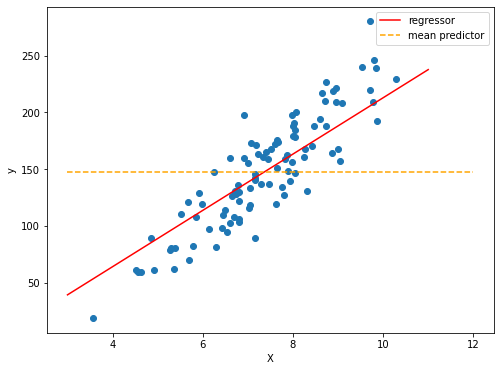

In [19]:
a = np.arange(3, 12)
b = W*a + W0

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(a, b, color="r", label="regressor")
plt.xlabel("X")
plt.ylabel("y")

# Plot a line for the random prediction: target mean. ecall that the R2 score also indicates how much
# our regressor performed better than the random predictor, a constatn line through the target mean
target_mean = np.mean(y)
c = [3, 12]
d = [target_mean, target_mean]
plt.plot(c, d, linestyle="--", color="orange", label="mean predictor")
plt.legend()
plt.show()

Now calculate the regression metrics:

In [20]:
predictions = W*X + W0
preds = np.reshape(predictions, (100,))

# MSE
mse = np.sum((y-preds)**2) / X.shape[0]

# R2
target_mean = np.mean(y)
ss_residual = np.sum((y-preds)**2)
ss_total = np.sum((y-target_mean)**2)
r2 = 1 - (ss_residual/ss_total)

print(f"MSE: {mse:.3f}")
print(f"R2: {r2:.3f}")

MSE: 592.732
R2: 0.754


**Discussion:** The MSE is a relative score as it depends on the quantity of the target variables. Therefore, R2 gives a better insight into the regression performance. We can see that our MLP regressor explained 75% variation of the target variable and thus provided slightly satisfactory results.

# END